In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import sqlalchemy
from sqlalchemy import create_engine, func, inspect, text

In [2]:
df = pd.read_csv("games.csv")
df.head()

,Title,Release Date,Publisher,Sub Publisher,Rating,Times Listed,Number of Reviews,Genres,Sub Genre,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Return of the Obra Dinn,18-Oct-18,3909,Lucas Pope,4.3,1K,1K,Adventure,Indie,"In this 1-bit first-person mystery game, a mer...",['This game made me feel so god damn smart. Ju...,4.7K,195,2.6K,2.4K
1,Deltarune: Chapter 2,17-Sep-21,4-Aug,tobyfox,4.3,737,737,Adventure,Indie,Deltarune: Chapter 2 is the next installment o...,"['Um jogo espetacular, amo as piadas e a gamep...",7.5K,222,2.1K,753
2,Deltarune: Chapter 1,31-Oct-18,4-Aug,tobyfox,3.9,591,591,Adventure,Indie,The story follows a human named Kris who lives...,"['√ìtima apresenta√ß√£o a um novo universo, no...",11K,107,1.8K,729
3,Umineko: When They Cry Chiru,15-Sep-09,07th Expansion,NaN,4.6,324,324,Adventure,Visual Novel,Umineko no Naku Koro ni Chiru is the second ha...,"['cried like a little bitch ngl', ""God I reall...",1.7K,108,582,493
4,Higurashi: When They Cry,10-Aug-02,07th Expansion,MangaGamer,4.2,311,311,Adventure,Visual Novel,Higurashi: When They Cry is a Japanese murder ...,['umidrones/umiroaches/uminekoids will rant an...,1.1K,97,545,435


In [3]:
engine = create_engine("sqlite:///games.sqlite")
df = pd.DataFrame(df)
df.to_sql("games", con=engine, if_exists="replace", index=False)

1130

In [4]:
# explore and understand the data

# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within each table and its types
for table in tables:
    print(table)
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])
        
    print()

games
Title TEXT
Release Date TEXT
Publisher TEXT
Sub Publisher TEXT
Rating FLOAT
Times Listed TEXT
Number of Reviews TEXT
Genres TEXT
Sub Genre TEXT
Summary TEXT
Reviews TEXT
Plays TEXT
Playing TEXT
Backlogs TEXT
Wishlist TEXT



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1130 non-null   object 
 1   Release Date       1130 non-null   object 
 2   Publisher          1127 non-null   object 
 3   Sub Publisher      878 non-null    object 
 4   Rating             1117 non-null   float64
 5   Times Listed       1130 non-null   object 
 6   Number of Reviews  1130 non-null   object 
 7   Genres             1127 non-null   object 
 8   Sub Genre          893 non-null    object 
 9   Summary            1129 non-null   object 
 10  Reviews            1130 non-null   object 
 11  Plays              1130 non-null   object 
 12  Playing            1130 non-null   object 
 13  Backlogs           1130 non-null   object 
 14  Wishlist           1130 non-null   object 
dtypes: float64(1), object(14)
memory usage: 132.5+ KB


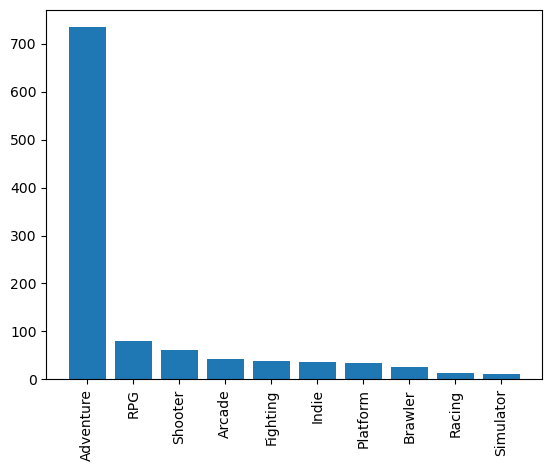

In [6]:
# what are the top 10 Most common genres?
data = df.Genres.value_counts()[0:10]

plt.bar(data.index, data.values)
plt.xticks(rotation =90)
plt.show()

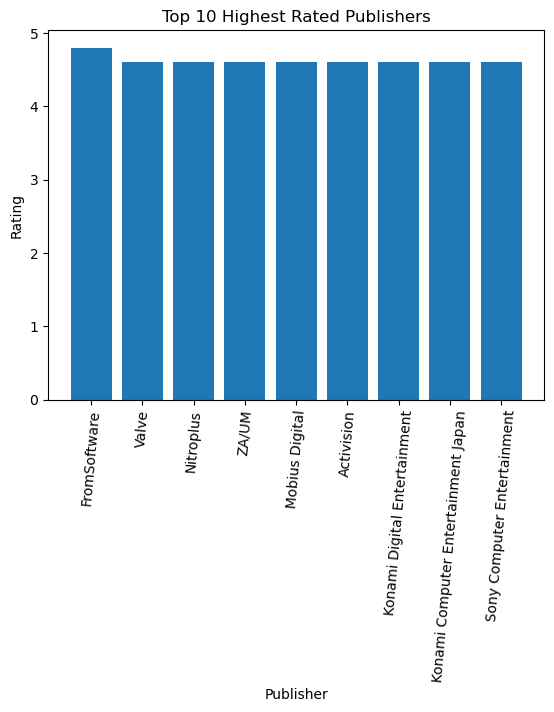

In [7]:
# # Create the scatter plot
# # Which publisher had the most games played
# plt.scatter(df['Publisher'], df['Rating'])

# # Set the title and labels
# plt.title('Comparison of Publisher and Rating')
# plt.xlabel('Publisher')
# plt.ylabel('Rating')

# # Show the chart
# plt.show()

# Sort the DataFrame by the "Plays" column in descending order
df1_sorted = df.sort_values('Rating', ascending=False)

# Select the top 10 rows
top_pub = df1_sorted.head(10)

# Create a bar plot
plt.bar(top_pub['Publisher'], top_pub['Rating'])
plt.xlabel('Publisher')
plt.ylabel('Rating')
plt.title('Top 10 Highest Rated Publishers')
plt.xticks(rotation=85)

# Display the plot
plt.show()

In [8]:
#highest rated game by genre
highest_rated_genre = df.groupby('Genres')['Rating'].mean()
print(highest_rated_genre)

Genres
Adventure             3.705777
Arcade                3.530952
Brawler               3.688000
Card & Board Game     3.491667
Fighting              3.478947
Indie                 3.559459
MOBA                  2.300000
Music                 3.700000
Platform              3.622857
Point-and-Click       3.900000
Puzzle                3.660000
RPG                   3.731169
Racing                3.600000
Real Time Strategy    3.533333
Shooter               3.472131
Simulator             3.616667
Sport                 3.457143
Strategy              3.800000
Visual Novel          3.000000
Name: Rating, dtype: float64


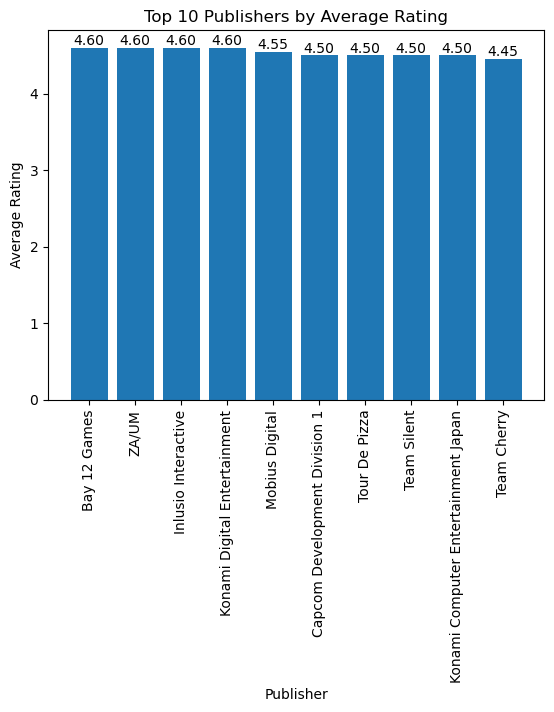

In [9]:
# # Create the scatter plot
# # Which publisher had the most games played
highest_rated_publisher = df.groupby('Publisher')['Rating'].mean()

# Sort the data in descending order
highest_rated_publisher = highest_rated_publisher.sort_values(ascending=False)

# Select the top 10 publishers
top_10_publishers = highest_rated_publisher.head(10)

# Create a bar plot
plt.bar(top_10_publishers.index, top_10_publishers.values)

# Set labels and title
plt.xlabel('Publisher')
plt.ylabel('Average Rating')
plt.title('Top 10 Publishers by Average Rating')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Add hover text to the bars
for i, value in enumerate(top_10_publishers.values):
    plt.annotate(f'{value:.2f}', (i, value), ha='center', va='bottom')

# Show the plot
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1130 non-null   object 
 1   Release Date       1130 non-null   object 
 2   Publisher          1127 non-null   object 
 3   Sub Publisher      878 non-null    object 
 4   Rating             1117 non-null   float64
 5   Times Listed       1130 non-null   object 
 6   Number of Reviews  1130 non-null   object 
 7   Genres             1127 non-null   object 
 8   Sub Genre          893 non-null    object 
 9   Summary            1129 non-null   object 
 10  Reviews            1130 non-null   object 
 11  Plays              1130 non-null   object 
 12  Playing            1130 non-null   object 
 13  Backlogs           1130 non-null   object 
 14  Wishlist           1130 non-null   object 
dtypes: float64(1), object(14)
memory usage: 132.5+ KB


In [11]:
df.head()

,Title,Release Date,Publisher,Sub Publisher,Rating,Times Listed,Number of Reviews,Genres,Sub Genre,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Return of the Obra Dinn,18-Oct-18,3909,Lucas Pope,4.3,1K,1K,Adventure,Indie,"In this 1-bit first-person mystery game, a mer...",['This game made me feel so god damn smart. Ju...,4.7K,195,2.6K,2.4K
1,Deltarune: Chapter 2,17-Sep-21,4-Aug,tobyfox,4.3,737,737,Adventure,Indie,Deltarune: Chapter 2 is the next installment o...,"['Um jogo espetacular, amo as piadas e a gamep...",7.5K,222,2.1K,753
2,Deltarune: Chapter 1,31-Oct-18,4-Aug,tobyfox,3.9,591,591,Adventure,Indie,The story follows a human named Kris who lives...,"['√ìtima apresenta√ß√£o a um novo universo, no...",11K,107,1.8K,729
3,Umineko: When They Cry Chiru,15-Sep-09,07th Expansion,NaN,4.6,324,324,Adventure,Visual Novel,Umineko no Naku Koro ni Chiru is the second ha...,"['cried like a little bitch ngl', ""God I reall...",1.7K,108,582,493
4,Higurashi: When They Cry,10-Aug-02,07th Expansion,MangaGamer,4.2,311,311,Adventure,Visual Novel,Higurashi: When They Cry is a Japanese murder ...,['umidrones/umiroaches/uminekoids will rant an...,1.1K,97,545,435


In [12]:
# Define a function to convert 'k' suffix to integers
def convert_to_int(value):
    if 'K' in value:
        return int(float(value[:-1]) * 1000)
    else:
        return int(value)

# Apply the conversion function to the 'Number' column
df['Backlogs'] = df['Backlogs'].apply(convert_to_int)
df['Wishlist'] = df['Wishlist'].apply(convert_to_int)


# Display the modified DataFrame
df.head()

,Title,Release Date,Publisher,Sub Publisher,Rating,Times Listed,Number of Reviews,Genres,Sub Genre,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Return of the Obra Dinn,18-Oct-18,3909,Lucas Pope,4.3,1K,1K,Adventure,Indie,"In this 1-bit first-person mystery game, a mer...",['This game made me feel so god damn smart. Ju...,4.7K,195,2600,2400
1,Deltarune: Chapter 2,17-Sep-21,4-Aug,tobyfox,4.3,737,737,Adventure,Indie,Deltarune: Chapter 2 is the next installment o...,"['Um jogo espetacular, amo as piadas e a gamep...",7.5K,222,2100,753
2,Deltarune: Chapter 1,31-Oct-18,4-Aug,tobyfox,3.9,591,591,Adventure,Indie,The story follows a human named Kris who lives...,"['√ìtima apresenta√ß√£o a um novo universo, no...",11K,107,1800,729
3,Umineko: When They Cry Chiru,15-Sep-09,07th Expansion,NaN,4.6,324,324,Adventure,Visual Novel,Umineko no Naku Koro ni Chiru is the second ha...,"['cried like a little bitch ngl', ""God I reall...",1.7K,108,582,493
4,Higurashi: When They Cry,10-Aug-02,07th Expansion,MangaGamer,4.2,311,311,Adventure,Visual Novel,Higurashi: When They Cry is a Japanese murder ...,['umidrones/umiroaches/uminekoids will rant an...,1.1K,97,545,435


In [13]:
# Define a function to convert 'k' suffix to integers
def convert_to_int(value):
    if 'K' in value:
        return int(float(value[:-1]) * 1000)
    else:
        return int(value)

# Apply the conversion function to the 'Number' column
df['Plays'] = df['Plays'].apply(convert_to_int)
df['Number of Reviews'] = df['Number of Reviews'].apply(convert_to_int)
df['Times Listed'] = df['Times Listed'].apply(convert_to_int)



# Display the modified DataFrame
df.head()

,Title,Release Date,Publisher,Sub Publisher,Rating,Times Listed,Number of Reviews,Genres,Sub Genre,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Return of the Obra Dinn,18-Oct-18,3909,Lucas Pope,4.3,1000,1000,Adventure,Indie,"In this 1-bit first-person mystery game, a mer...",['This game made me feel so god damn smart. Ju...,4700,195,2600,2400
1,Deltarune: Chapter 2,17-Sep-21,4-Aug,tobyfox,4.3,737,737,Adventure,Indie,Deltarune: Chapter 2 is the next installment o...,"['Um jogo espetacular, amo as piadas e a gamep...",7500,222,2100,753
2,Deltarune: Chapter 1,31-Oct-18,4-Aug,tobyfox,3.9,591,591,Adventure,Indie,The story follows a human named Kris who lives...,"['√ìtima apresenta√ß√£o a um novo universo, no...",11000,107,1800,729
3,Umineko: When They Cry Chiru,15-Sep-09,07th Expansion,NaN,4.6,324,324,Adventure,Visual Novel,Umineko no Naku Koro ni Chiru is the second ha...,"['cried like a little bitch ngl', ""God I reall...",1700,108,582,493
4,Higurashi: When They Cry,10-Aug-02,07th Expansion,MangaGamer,4.2,311,311,Adventure,Visual Novel,Higurashi: When They Cry is a Japanese murder ...,['umidrones/umiroaches/uminekoids will rant an...,1100,97,545,435


In [14]:
df.head()

,Title,Release Date,Publisher,Sub Publisher,Rating,Times Listed,Number of Reviews,Genres,Sub Genre,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Return of the Obra Dinn,18-Oct-18,3909,Lucas Pope,4.3,1000,1000,Adventure,Indie,"In this 1-bit first-person mystery game, a mer...",['This game made me feel so god damn smart. Ju...,4700,195,2600,2400
1,Deltarune: Chapter 2,17-Sep-21,4-Aug,tobyfox,4.3,737,737,Adventure,Indie,Deltarune: Chapter 2 is the next installment o...,"['Um jogo espetacular, amo as piadas e a gamep...",7500,222,2100,753
2,Deltarune: Chapter 1,31-Oct-18,4-Aug,tobyfox,3.9,591,591,Adventure,Indie,The story follows a human named Kris who lives...,"['√ìtima apresenta√ß√£o a um novo universo, no...",11000,107,1800,729
3,Umineko: When They Cry Chiru,15-Sep-09,07th Expansion,NaN,4.6,324,324,Adventure,Visual Novel,Umineko no Naku Koro ni Chiru is the second ha...,"['cried like a little bitch ngl', ""God I reall...",1700,108,582,493
4,Higurashi: When They Cry,10-Aug-02,07th Expansion,MangaGamer,4.2,311,311,Adventure,Visual Novel,Higurashi: When They Cry is a Japanese murder ...,['umidrones/umiroaches/uminekoids will rant an...,1100,97,545,435


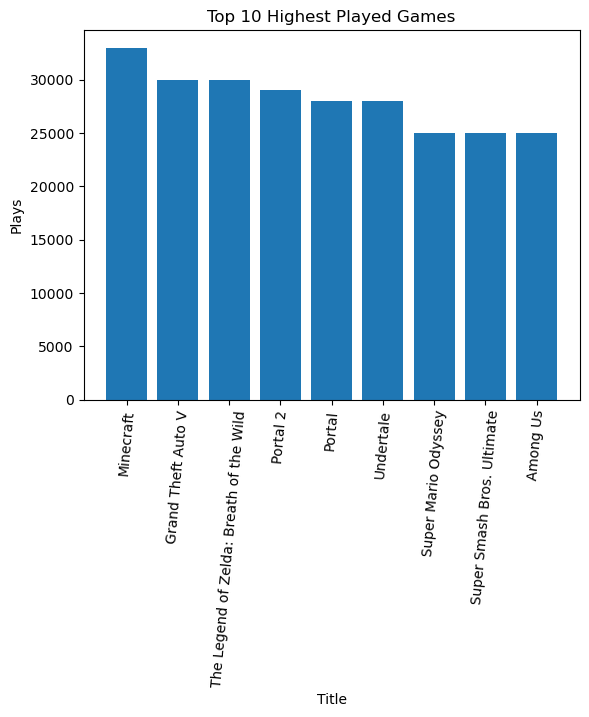

In [15]:
# Sort the DataFrame by the "Plays" column in descending order
df_sorted = df.sort_values('Plays', ascending=False)

# Select the top 10 rows
top_10 = df_sorted.head(10)

# Create a bar plot
plt.bar(top_10['Title'], top_10['Plays'])
plt.xlabel('Title')
plt.ylabel('Plays')
plt.title('Top 10 Highest Played Games')
plt.xticks(rotation=85)

# Display the plot
plt.show()